           0         1
0    6.17182  0.000000
1   -6.33125 -0.099459
2    6.16752  0.193822
3   -6.32756 -0.298400
4    6.15440  0.387202
..       ...       ...
195 -6.32070  0.497450
196  6.15440 -0.387202
197 -6.32756  0.298400
198  6.16752 -0.193822
199 -6.33125  0.099459

[200 rows x 2 columns]
           0         1
0    6.17182  0.000000
1   -6.33125 -0.099459
2    6.16752  0.193822
3   -6.32756 -0.298400
4    6.15440  0.387202
..       ...       ...
195 -6.32070  0.497450
196  6.15440 -0.387202
197 -6.32756  0.298400
198  6.16752 -0.193822
199 -6.33125  0.099459

[200 rows x 2 columns]


/home/codespace/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/codespace/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


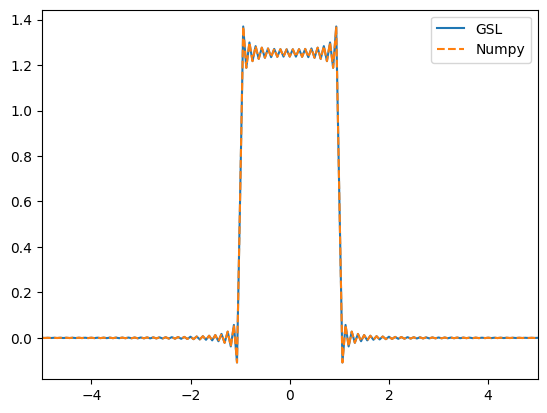

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


###################Question1######################

def function_x(x):
    if (x==0):
        return 1
    else:
        return np.sin(x)/x


min_x = -50
max_x = 50
N = 200
delta_x = (max_x-min_x)/(N-1)


sample_data =[]
for i in range(N):
    sample_data.append(function_x(min_x+i*delta_x))




discrete_fourier_transform = np.fft.fft(sample_data,norm='ortho')
k_values = (2*np.pi/delta_x)*np.fft.fftfreq(N)               #JUST GIVES q/N

sorted_values = []

for i in range(N):
    sorted_values.append([k_values[i],discrete_fourier_transform[i]])

sorted_values.sort(key=lambda x:x[0])

final_k_values,final_dft_values = [],[]
for l in range(N):
    final_dft_values.append(delta_x*(N/(2*np.pi))**0.5*np.exp(-1j*min_x*sorted_values[l][0])*sorted_values[l][1])
    final_k_values.append(sorted_values[l][0])


def analytical_function(k):
    return 1/2.* np.sqrt(np.pi/2)*(np.sign(1-k)+np.sign(1+k))

k_values = np.array(final_k_values)





####################Question2######################
data_frame_1 = pd.read_csv('transformed_data.csv',sep=",",header=None)
print(data_frame_1)



min_x = -50
max_x = 50
N = 200
delta_x = (max_x-min_x)/(N-1)

factor = (delta_x)*np.sqrt(N/(2*np.pi))*np.exp(-1j*k_values*min_x)
data_array_1 = data_frame_1.to_numpy()
fourier_transform_1 = data_array_1[:,0]+1j*data_array_1[:,1]
fourier_transform_1 = factor*np.fft.fftshift(fourier_transform_1)/np.sqrt(N)


####################Question3######################
data_frame_2 = pd.read_csv('q3_data.csv',sep=",",header=None)
print(data_frame_2)



min_x = -50
max_x = 50
N = 200
delta_x = (max_x-min_x)/(N-1)

factor = (delta_x)*np.sqrt(N/(2*np.pi))*np.exp(-1j*k_values*min_x)
data_array_2 = data_frame_2.to_numpy()
fourier_transform_2 = data_array_2[:,0]+1j*data_array_2[:,1]
fourier_transform_2 = factor*np.fft.fftshift(fourier_transform_2)/np.sqrt(N)




##################To Plot###############

plt.plot(k_values,np.real(fourier_transform_2),label='GSL')
plt.plot(final_k_values,final_dft_values,'--',label='Numpy')
plt.xlim(-5,5)
plt.legend()
plt.show()
